In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/malek/Desktop/gomycode/Machine_Learning/classification/titanic-passengers.csv",sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Age"].tail()

886    14.000000
887    22.000000
888    30.000000
889    29.699118
890    19.000000
Name: Age, dtype: float64

In [6]:
df.describe(include=['O'])

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,No,"Nicholson, Mr. Arthur Ernest",male,347082,C23 C25 C27,S
freq,549,1,577,7,4,644


In [7]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,830,Yes,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
399,62,Yes,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [8]:
df[df["Cabin"]=="B28"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,830,Yes,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
399,62,Yes,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [9]:
df[df["Ticket"]=="113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,830,Yes,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
399,62,Yes,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [10]:
df["Embarked"].fillna('S',inplace=True)
df[df["Ticket"]=="113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,830,Yes,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S
399,62,Yes,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S


In [11]:
df[df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000000,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.000000,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.500000,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,NaN,S
10,135,No,2,"Sobey, Mr. Samuel James Hayden",male,25.000000,0,0,C.A. 29178,13.0000,NaN,S
11,294,No,3,"Haas, Miss. Aloisia",female,24.000000,0,0,349236,8.8500,NaN,S


In [12]:
df[df["Ticket"]=="3101265"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
878,787,Yes,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S


In [13]:
df[df["Cabin"]=="B96 B98"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,391,Yes,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
473,764,Yes,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
806,803,Yes,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S
832,436,Yes,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S


In [14]:
df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


In [15]:
df[df["Pclass"]==2].describe(include=['O'])

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,184,184,184,184,16,184
unique,2,184,2,140,7,3
top,No,"Gillespie, Mr. William Henry",male,S.O.C. 14879,F33,S
freq,97,1,108,5,3,164


In [16]:
#Cabin
df.dropna(axis=1,how='any',inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Survived"]=encoder.fit_transform(df["Survived"])
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Embarked"]=encoder.fit_transform(df["Embarked"])

In [18]:
#Data Transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int32
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null int32
dtypes: float64(2), int32(3), int64(4), object(2)
memory usage: 66.2+ KB


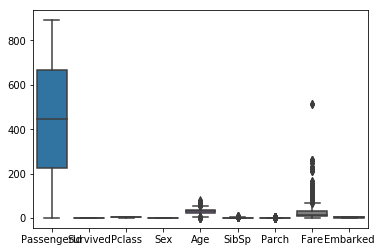

In [19]:
sns.boxplot(data=df)

In [20]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
d=df.copy()

d["Survived"]=scaler.fit_transform(d[["Survived"]].values)
d["Age"]=scaler.fit_transform(d[["Age"]].values)
d["Pclass"]=scaler.fit_transform(d[["Pclass"]].values)
d["Sex"]=scaler.fit_transform(d[["Sex"]].values)
d["Embarked"]=scaler.fit_transform(d[["Embarked"]].values)


C:\Users\malek\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\malek\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\malek\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\malek\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\malek\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to f

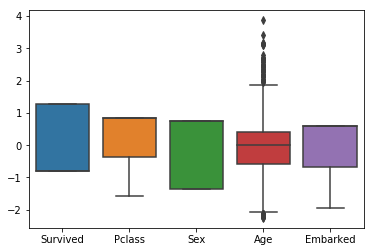

In [21]:
x=d.drop(["PassengerId","SibSp","Parch","Fare"],axis=1)
sns.boxplot(data=x)

Text(0.5, 0, 'Age')

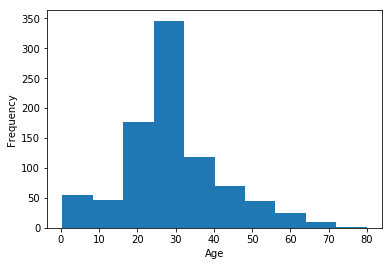

In [22]:
#Visualization part
#distribution of the most important features 
#Age
df['Age'].plot.hist()
plt.xlabel("Age")

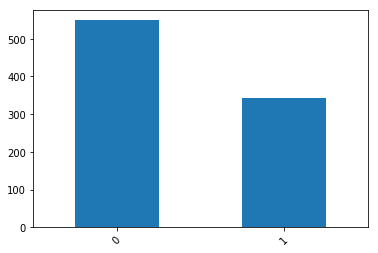

In [23]:
#Survived
s=df["Survived"].value_counts()
s.plot.bar(rot=45)

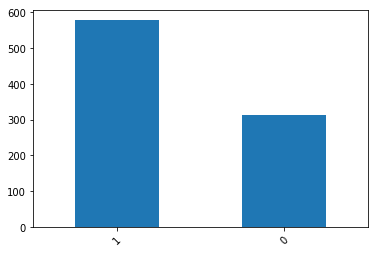

In [24]:
#Sex
s=df["Sex"].value_counts()
s.plot.bar(rot=45)

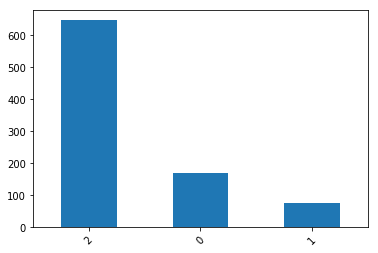

In [25]:
#Embarked
s=df["Embarked"].value_counts()
s.plot.bar(rot=45)

Text(0.5, 0, 'Pclass')

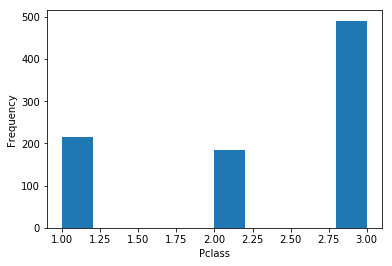

In [26]:
#Pclass
df['Pclass'].plot.hist()
plt.xlabel("Pclass")

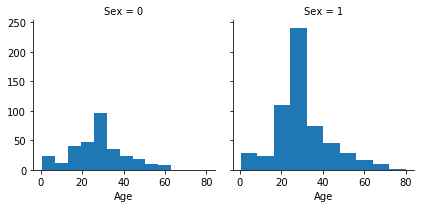

In [27]:
g=sns.FacetGrid(df,col="Sex")
g.map(plt.hist,'Age',bins=10)

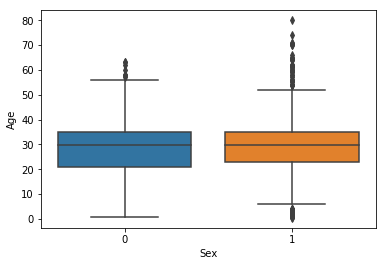

In [28]:
d=df.drop(["PassengerId","Survived","Pclass","Name","SibSp","Parch","Ticket","Fare","Embarked"],axis=1)
sns.boxplot(data=d,x="Sex",y="Age")

In [29]:
s=df[df["Survived"]==0]
s.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2


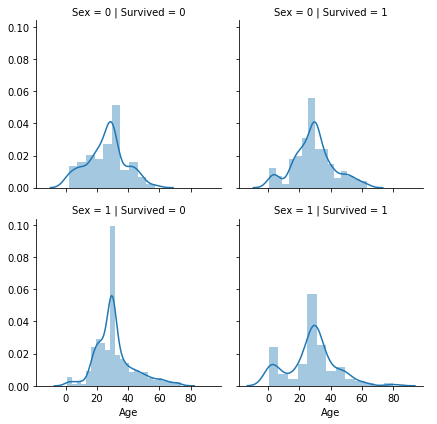

In [30]:
g=sns.FacetGrid(df,'Sex',col='Survived')
g.map(sns.distplot,'Age')
g.add_legend()

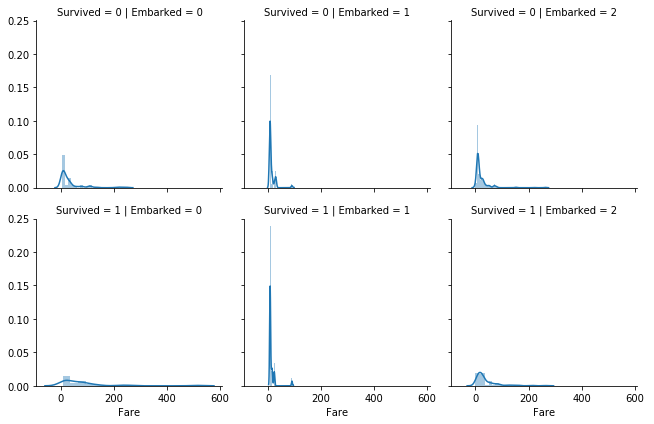

In [31]:
g=sns.FacetGrid(df,"Survived",col="Embarked")
g.map(sns.distplot,'Fare')
g.add_legend()

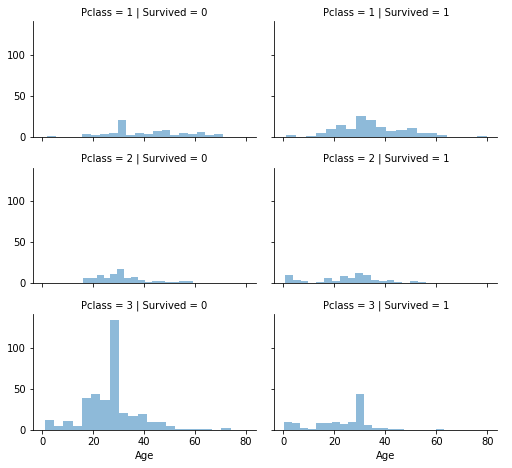

In [32]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

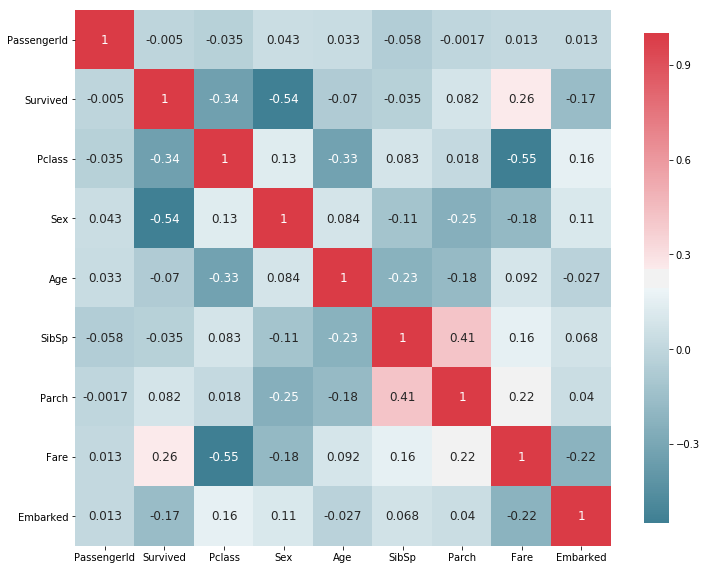

In [33]:
def plot_correlation_map( df):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )


From the heatmap,we better understand the relationships between variables. The statistical relationship between
two variables is referred to as their correlation.
we observe that there is a positive correlation of 0.41 between Parch and SibSp.
However,for the rest of the features we observe either a very low correlation or a negative like a correlation of -0.55 
between Pclass and Fare and -0.54 between survived and sex.
We note a correlation equal to 1 is a self-correlation between the same attribute(the attribute and itself).
This correlation is not important



In [34]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 
df[['Pclass','Survived']].groupby(['Survived'],as_index=True).mean()

,Pclass
Survived,
0,2.531876
1,1.950292


In [35]:
w=(df[['Pclass','Survived','Embarked']].groupby(['Survived','Embarked'],as_index=True).mean())
w

Pclass
Survived Embarked          
0        0         2.200000
         1         2.936170
         2         2.545667
1        0         1.634409
         1         2.866667
         2         1.958904

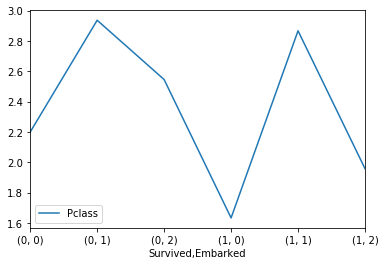

In [36]:
w.plot()

In [37]:
df=df.drop(["PassengerId","Ticket"],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2


In [38]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mr
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mr


C:\Users\malek\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


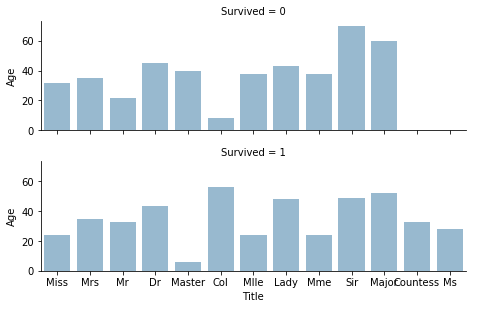

In [39]:
g=sns.FacetGrid(df,row="Survived",height=2.2,aspect=3)
g.map(sns.barplot,"Title","Age",alpha=.5,ci=None)
g.add_legend()

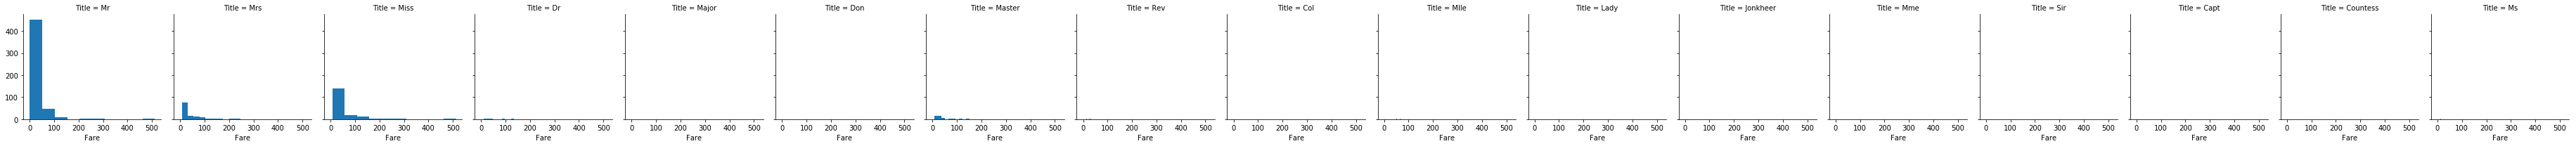

In [40]:
g=sns.FacetGrid(df,col="Title")
g.map(plt.hist,'Fare',bins=10)

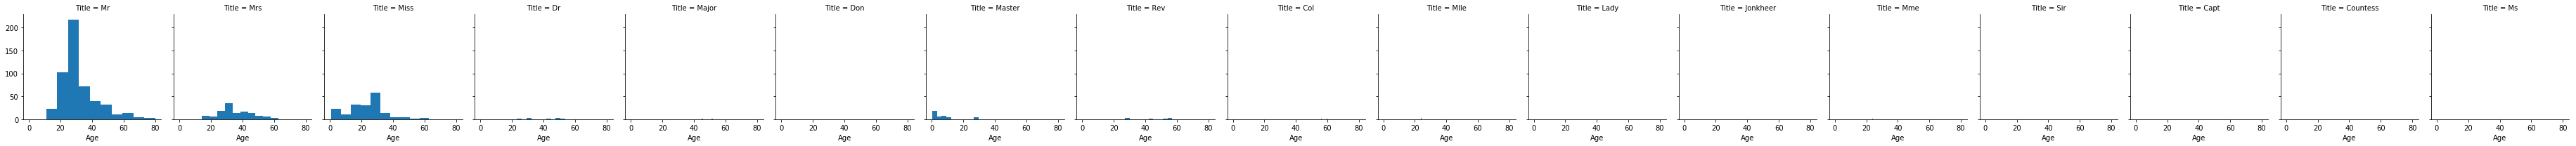

In [41]:
g=sns.FacetGrid(df,col="Title")
g.map(plt.hist,'Age',bins=10)

C:\Users\malek\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


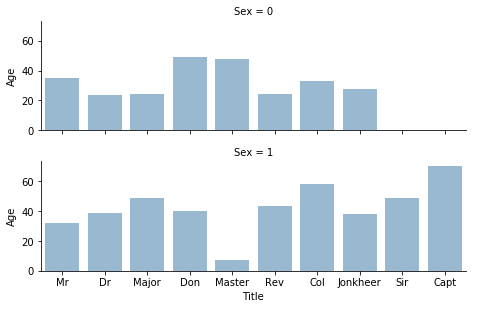

In [42]:
g=sns.FacetGrid(df,row="Sex",height=2.2,aspect=3)
g.map(sns.barplot,"Title","Age",alpha=.5,ci=None)
g.add_legend()

In [43]:
Title_Dictionary = {"Capt": "Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty","Don":"Royalty","Sir":"Royalty","Lady":"Royalty",
"the Countess":"Royalty","Dona":"Royalty","Mme":"Miss","Mlle":"Miss","Miss":"Miss","Ms":"Mrs","Mr" :"Mrs","Mrs" :"Mrs","Master":"Master"}

In [44]:
df["Title"]=df["Title"].map(Title_Dictionary)

In [45]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mrs
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mrs


In [46]:
df=df.drop(["Name"],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,1,28.0,0,0,13.0000,2,Mrs
1,0,3,1,25.0,0,0,7.6500,2,Mrs
2,0,3,1,20.0,0,0,7.8542,2,Mrs
3,0,3,0,29.0,0,4,21.0750,2,Mrs
4,0,1,1,31.0,1,0,52.0000,2,Mrs


C:\Users\malek\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


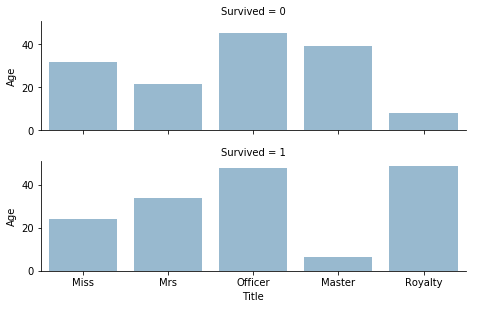

In [47]:
g=sns.FacetGrid(df,row="Survived",height=2.2,aspect=3)
g.map(sns.barplot,"Title","Age",alpha=.5,ci=None)
g.add_legend()

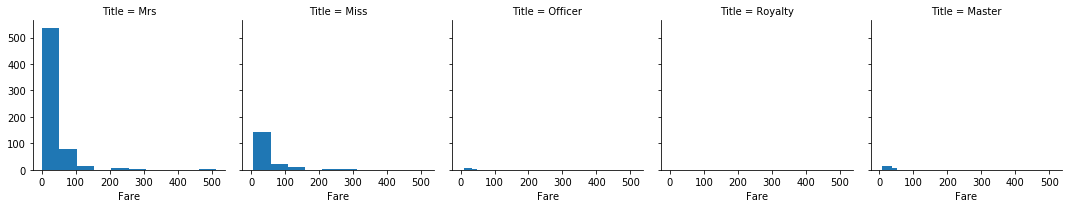

In [48]:
g=sns.FacetGrid(df,col="Title")
g.map(plt.hist,'Fare',bins=10)

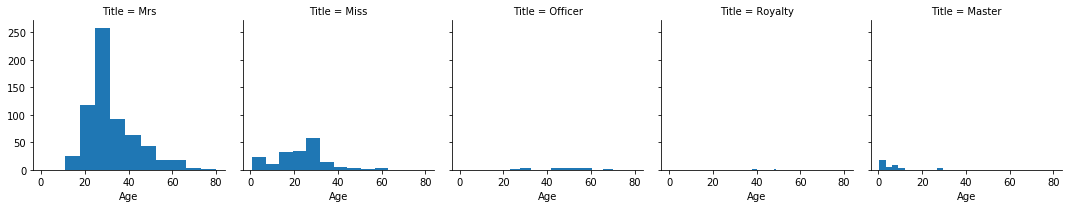

In [49]:
g=sns.FacetGrid(df,col="Title")
g.map(plt.hist,'Age',bins=10)

C:\Users\malek\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


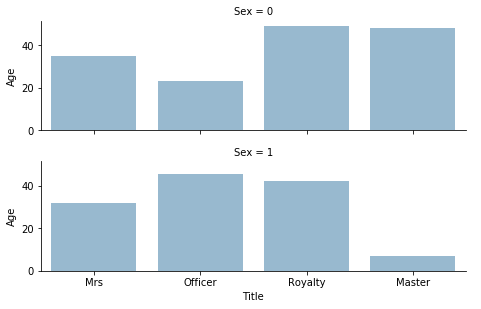

In [50]:
g=sns.FacetGrid(df,row="Sex",height=2.2,aspect=3)
g.map(sns.barplot,"Title","Age",alpha=.5,ci=None)
g.add_legend()

In [51]:
df["FamilySize"]=df["SibSp"]+df["Parch"]+1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,1,28.0,0,0,13.0000,2,Mrs,1
1,0,3,1,25.0,0,0,7.6500,2,Mrs,1
2,0,3,1,20.0,0,0,7.8542,2,Mrs,1
3,0,3,0,29.0,0,4,21.0750,2,Mrs,5
4,0,1,1,31.0,1,0,52.0000,2,Mrs,2


In [52]:
df=df.drop(["SibSp","Parch"],axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,1,28.0,13.0000,2,Mrs,1
1,0,3,1,25.0,7.6500,2,Mrs,1
2,0,3,1,20.0,7.8542,2,Mrs,1
3,0,3,0,29.0,21.0750,2,Mrs,5
4,0,1,1,31.0,52.0000,2,Mrs,2


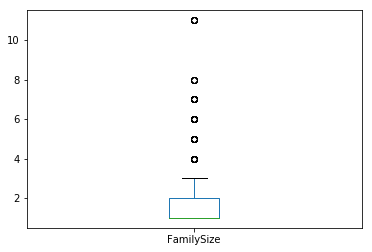

In [53]:
df["FamilySize"].plot.box()

<function matplotlib.pyplot.show(*args, **kw)>

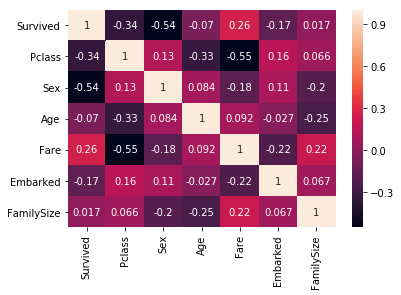

In [54]:
sns.heatmap(df.corr(),annot=True)
plt.show

In [55]:
#Data transformation(Title)
#One hot encoding
one_hot=pd.get_dummies(df["Title"])
df=df.drop("Title",axis=1)
df=df.join(one_hot)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Master,Miss,Mrs,Officer,Royalty
0,0,2,1,28.0,13.0000,2,1,0,0,1,0,0
1,0,3,1,25.0,7.6500,2,1,0,0,1,0,0
2,0,3,1,20.0,7.8542,2,1,0,0,1,0,0
3,0,3,0,29.0,21.0750,2,5,0,0,1,0,0
4,0,1,1,31.0,52.0000,2,2,0,0,1,0,0


this feature is useless because the correlation with survived is 0.017.

In [56]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [57]:
x=df[["Pclass", "Sex", "Age", "Fare","Embarked","FamilySize","Master","Miss","Mrs","Officer","Royalty"]]
y=df["Survived"]

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


In [58]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)

predicted    0   1
actuel            
0          142  20
1           23  83


In [59]:
#Classification Report(precesion recall f1-score support)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       162
           1       0.81      0.78      0.79       106

   micro avg       0.84      0.84      0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



Text(0.5, 1.05, 'Confusion_matrix')

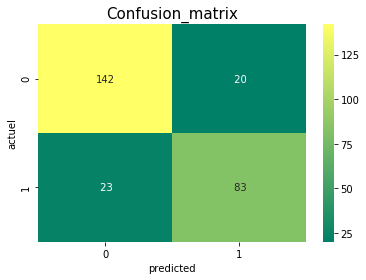

In [60]:
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

ROC CURVE AND AUC SCORE:

   AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes.

  ROC tells us how good the model is for distinguishing the given classes,in terms of the predicted probability.
A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.

  The area covered by the curve is the area between the ROC line and the axis. This area covered is AUC.
The bigger the area covered,the better the machine learning models is at distinguishing the given classes. 
Ideal value for AUC is 1.


In [71]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [72]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [73]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)


In [74]:
#Predict probabilities for the test data.
probs = logreg.predict_proba(x_test)

In [75]:
#Keep Probabilities of the positive class only.
probs = probs[:, 1]

In [76]:
#Compute the AUC Score.
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.90


In [77]:
#Get the ROC Curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

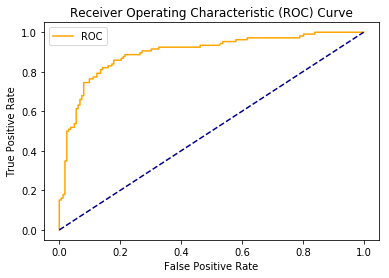

In [78]:
#Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)